# Proyek Analisis Data: [Air-quality-dataset]
- **Nama:** Rafael Siregar
- **Email:** rafael_siregar@students.polmed.ac.id
- **ID Dicoding:** rafael_siregar

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan suhu rata-rata bulanan dalam rentan tahun 2014 ??
- Apakah tingkat CO dan NO2 di stasiun Shunyi mengalami peningkatan selama 2013-2015?

## Import Semua Packages/Library yang Digunakan

In [861]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pengumpulan data kita lakukan sederhana dengan meletakkan dataset kedalam 1 folder dengan notebook kita (ipynb)
Disini kita melakukan pemanggilan data dari format csv, dan ini adalah data pada stasiun Dongsi dan juga kita melakukan pemanggilan data dari format csv, dan ini adalah data pada stasiun Shunyi

In [ ]:
data1 = pd.read_csv('data/PRSA_Data_Dongsi_20130301-20170228.csv',delimiter=',') 
data2 = pd.read_csv('data/PRSA_Data_Shunyi_20130301-20170228.csv',delimiter=',') 

#Kita hanya akan mengambil kolom yang kita butuhkan saja sepereti tahun, bulan, NO2, CO, TEMP, dan station
data1 = data1[['year','month','NO2','CO','TEMP','station']] 
data2 = data2[['year','month','NO2','CO','TEMP','station']] 
#kemudian kita akan coba tampilkan data yang kita ambil
print(data1) #menampilkan 5 data teratas dari data1
print(data2) #menampilkan 5 data teratas dari data2

       year  month   NO2      CO  TEMP station
0      2013      3  17.0   300.0  -0.5  Dongsi
1      2013      3  16.0   300.0  -0.7  Dongsi
2      2013      3  17.0   300.0  -1.2  Dongsi
3      2013      3  18.0     NaN  -1.4  Dongsi
4      2013      3   NaN   200.0  -1.9  Dongsi
...     ...    ...   ...     ...   ...     ...
35059  2017      2  29.0   400.0  12.5  Dongsi
35060  2017      2  43.0   500.0  11.6  Dongsi
35061  2017      2  61.0   700.0  10.8  Dongsi
35062  2017      2  75.0   900.0  10.5  Dongsi
35063  2017      2  87.0  1200.0   8.6  Dongsi

[35064 rows x 6 columns]
       year  month   NO2      CO  TEMP station
0      2013      3   8.0   300.0  -0.9  Shunyi
1      2013      3   7.0   300.0  -1.1  Shunyi
2      2013      3   7.0   200.0  -1.7  Shunyi
3      2013      3   5.0     NaN  -2.1  Shunyi
4      2013      3   NaN   200.0  -2.4  Shunyi
...     ...    ...   ...     ...   ...     ...
35059  2017      2  92.0   800.0  10.3  Shunyi
35060  2017      2  86.0  1100.0  

**Insight:**
- terdapat kolom year,month,NO2,CO,TEMP,station yang dipanggil dengan jumlah data sebanyak 35063 pada dataset stasiun Dongsi
- terdapat kolom year,month,NO2,CO,TEMP,station yang dipanggil dengan jumlah data sebanyak 35063 pada dataset stasiun Shunyi

### Assessing Data

Assesing data berarti kita akan melakukan Pemeriksaan dan mengidentifikasi kejanggalan atau masalah yang terdapat pada dataset yang kita gunakan.
dalam tahap ini saya menggunakan fungsi info(), describe(), duplicated().sum() ,isna().sum() untuk melakukan pengecekan apakah terdapat duplikasi, Null values/not a number values, dan menilai outlier berdasarkan standard deviasi dari fungsi describe()

## Assesing data1 (stasiun Dongsi)

In [863]:

print(data1.info()) #menampilkan informasi dari data1
print(data1.describe()) #menampilkan deskripsi dari data1
print("Jumlah Duplikasi data pada Stasiun Dongsi : ",data1.duplicated().sum())
print(data1.isna().sum()) #menampilkan jumlah data yang hilang pada data1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     35064 non-null  int64  
 1   month    35064 non-null  int64  
 2   NO2      33463 non-null  float64
 3   CO       31867 non-null  float64
 4   TEMP     35044 non-null  float64
 5   station  35064 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 1.6+ MB
None
               year         month           NO2            CO          TEMP
count  35064.000000  35064.000000  33463.000000  31867.000000  35044.000000
mean    2014.662560      6.522930     53.699443   1330.069131     13.671490
std        1.177213      3.448752     33.959230   1191.305887     11.458418
min     2013.000000      1.000000      2.000000    100.000000    -16.800000
25%     2014.000000      4.000000     27.000000    600.000000      3.100000
50%     2015.000000      7.000000     47.000000   1000.000000    

## Asssesing data2 (stasiun Shunyi)

In [864]:

print(data2.info()) #menampilkan informasi dari data2
print(data2.describe()) #menampilkan deskripsi dari data2
print("Jumlah Duplikasi data pada Stasiun Shunyi : ",data2.duplicated().sum())
print(data2.isna().sum()) #menampilkan jumlah data yang hilang pada data2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     35064 non-null  int64  
 1   month    35064 non-null  int64  
 2   NO2      33699 non-null  float64
 3   CO       32886 non-null  float64
 4   TEMP     35013 non-null  float64
 5   station  35064 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 1.6+ MB
None
               year         month           NO2            CO          TEMP
count  35064.000000  35064.000000  33699.000000  32886.000000  35013.000000
mean    2014.662560      6.522930     43.908865   1187.063979     13.387969
std        1.177213      3.448752     30.996828   1156.374102     11.483588
min     2013.000000      1.000000      2.000000    100.000000    -16.800000
25%     2014.000000      4.000000     19.000000    400.000000      3.000000
50%     2015.000000      7.000000     37.000000    800.000000    

**Insight:**
- pada data pertama yaitu stasiun Dongsi terdapat sejumlah null atau nilai NA dengan jumlah 1601 data pada kolom NO2 , 3197 data pada kolom CO2, 20 data pada kolom TEMP yang selanjutnya akan diberikan tindakan cleaning data
- Terdapat 504 duplikasi data.
- Standard deviasi tinggi di kolom CO pada data stasiun Dongsi ini, namun saya asumsikan penyebab hal ini karena satuan yang dipakai adalah mikrogram/meter kubik
- pada data kedua yaitu stasiun Shunyi terdapat sejumlah null atau nilai NA dengan jumlah 1365 data pada kolom NO2 , 2178 data pada kolom CO2, 51 data pada kolom TEMP yang kemudian akan di cleaning data nya 
- Terdapat 365 duplikasi data.
- Standard deviasi tinggi di kolom CO pada data stasiun Shunyi ini, namun saya asumsikan penyebab hal ini karena satuan yang dipakai adalah mikrogram/meter kubik

### Cleaning Data

Setelah melakukan pemeriksaan dan identifikasi masalah pada data, saatnya kita melakukan pembersihan pada data-data yang bermasalah. beberapa hal umum yang menjadi masalah pada data adalah permasalahan pada Tipe data, Missing value, Duplicate data, Inaccurate value yang mungkin dapat menyebabkan nilai standar deviasi yang besar ataupun Outlier yang terlalu tinggi dan terlalu rendah.

## Menghapus Duplikasi

In [865]:
#kita akan menangani duplikasi pada data1 dan data2
data1.drop_duplicates(inplace=True) #menghapus duplikasi pada data1
data2.drop_duplicates(inplace=True) #menghapus duplikasi pada data2

## Menghapus Nilai null

In [866]:
#kita akan menghapus nilai NA atau isnull pada data1 dan data2
data1.dropna(inplace=True) #menghapus nilai NA pada data1
data2.dropna(inplace=True) #menghapus nilai NA pada data2

**Insight:**
- Kita sudah berhasil melakukan penghapusan data bernilai null pada data1 dan data2
- Kita juga sudah berhasil melakukan pembersihan data duplikat pada data1 dan data2

## Exploratory Data Analysis (EDA)

### Explore ...

Selanjutnya kita masuk pada tahap Explore data Analysis. Dalam tahap ini kita akan mencoba Explore data sedetail mungkin dan mulai fokus pada Pertanyaan yang tadi sudah kita definisikan diawal. Kita akan melakukan nya dengan berbagai metode seperti describe(), groupby(), agg(), sort_values(), dan lain sebagainya

## Mengeksplore data1 stasiun Dongsi
Kita akan coba describe data1 ini dan melakukan grouping data. selain itu kita akan melakukan sort_values juga

In [867]:
#Mengelompokkan data berdasarkan tahun dan bulan, station untuk melihat rata-rata dari NO2, CO, dan TEMP
data1_grouped = data1.groupby(['year', 'month', 'station']).agg({
    'NO2': ['mean'],
    'CO': ['mean'],
    'TEMP': ['mean','min', 'max']
})
print(data1_grouped)#menampilkan data1 yang sudah dikelompokkan

                          NO2           CO       TEMP                  
                         mean         mean       mean    min        max
year month station                                                     
2013 3     Dongsi   77.993548  1530.946774   6.389839  -5.40  21.700000
     4     Dongsi   44.699058   978.617691  12.630735   0.90  29.400000
     5     Dongsi   50.737752  1156.963977  21.979251   7.90  35.000000
     6     Dongsi   64.485714  1699.016327  21.202041  16.10  33.900000
     8     Dongsi   43.340326  1116.317016  27.099534  15.70  35.700000
     9     Dongsi   59.250368  1395.281296  20.481443   6.40  31.000000
     10    Dongsi   72.582153  1370.679887  13.017705   0.80  24.700000
     11    Dongsi   70.159322  1442.372881   8.520678  -0.50  18.400000
     12    Dongsi   68.533557  1964.765101  -1.031879  -8.30   9.600000
2014 1     Dongsi   65.538106  2197.921478  -0.596074  -9.90  11.400000
     2     Dongsi   57.553846  1743.076923   3.666154  -2.60   8

**Insight:**
- Kualitas udara di stasiun Dongsi sepanjang tahun 2013 sampai 2017 pada kandungan CO nya berada dibawah rata rata 10.000 yang berarti kualitas udara tergolong masih baik untuk kesehatan
- dari kolom TEMP, musim dingin mulai terjadi dari bulan 11 sampai ke bulan 3 setiap tahunya dengan suhu rata rata dibawah 10 drajat
-Pada kolom NO2, rata-rata nilainya dibawah 90 yang berarti sepanjang tahun 2013 sampai 2017 kualitas udara stasiun Dongsi tergolong baik

## Mengeksplore data2 stasiun Shunyi
Kita akan coba describe data1 ini dan melakukan grouping data. selain itu kita akan melakukan sort_values juga

In [868]:
#Mengelompokkan data berdasarkan tahun dan bulan, station Shunyi untuk melihat rata-rata dari NO2, CO, dan TEMP
data2_grouped = data2.groupby(['year', 'month', 'station']).agg({
    'NO2': ['mean'],
    'CO': ['mean'],
    'TEMP': ['mean', 'min', 'max']
})
print(data2_grouped)#menampilkan data1 yang sudah dikelompokkan

                          NO2           CO       TEMP              
                         mean         mean       mean     min   max
year month station                                                 
2013 3     Shunyi   59.718704  1406.354934   5.800736  -5.600  20.0
     4     Shunyi   40.531072  1032.657817  12.159440  -0.800  27.9
     5     Shunyi   43.283520  1021.420391  21.728631   7.900  35.4
     6     Shunyi   35.190994  1390.385093  24.054969  14.300  35.0
     7     Shunyi   26.156934   910.182482  27.063504  20.600  36.3
     8     Shunyi   30.241894  1015.119363  25.948276  15.800  34.4
     9     Shunyi   27.975182  1217.948905  20.221460   7.700  31.3
     10    Shunyi   53.398876  1136.657303  12.664747   0.900  24.9
     11    Shunyi   53.097525  1227.802038   5.682387  -5.200  18.6
     12    Shunyi   48.975749  1775.463623  -0.269615  -9.900  14.9
2014 1     Shunyi   55.944367  1655.771905  -0.613769 -10.500  11.0
     2     Shunyi   55.184211  1947.697368  -0.2

**Insight:**
- Kualitas udara di stasiun Shunyi sepanjang tahun 2013 sampai 2017 pada kandungan CO nya berada dibawah rata rata 10.000 yang berarti kualitas udara di stasiun Shunyi ini juga tergolong masih baik untuk kesehatan
- dari kolom TEMP, musim dingin mulai terjadi dari bulan 11 sampai ke bulan 3 setiap tahunya dengan suhu rata rata dibawah 10 drajat dan suhu di stasiun Shunyi ini lebih dingin pada bulan tersebut dibandingkan dengan stasiun Donghi
-Pada kolom NO2, rata-rata nilainya dibawah 90 yang berarti sepanjang tahun 2013 sampai 2017 kualitas udara stasiun Shunyi juga masih tergolong baik

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana perubahan suhu rata-rata bulanan dalam rentan tahun 2014 ?

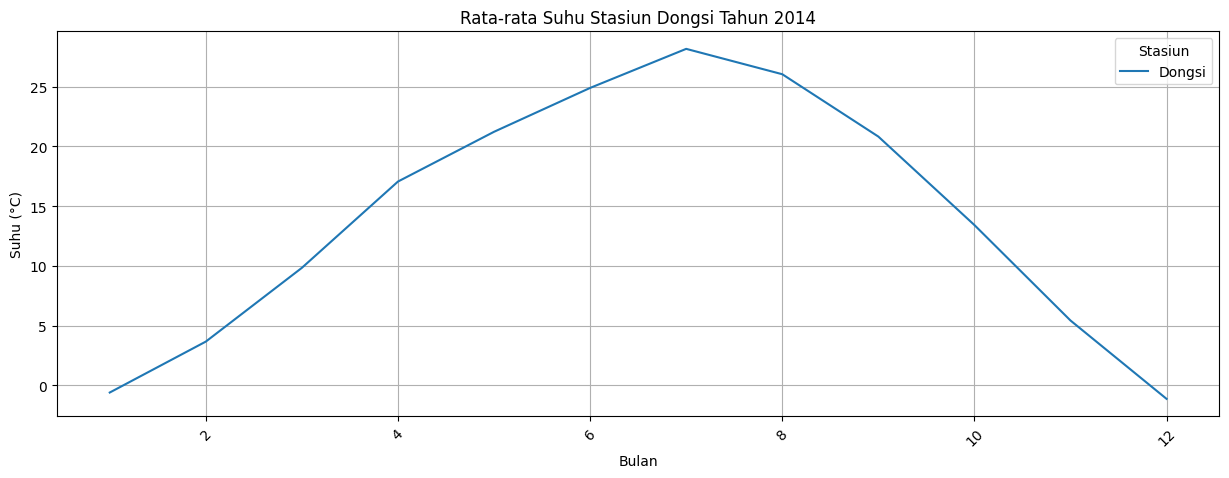

In [869]:
#kita akan visualisasi dengan line diagram bagaimana perbuahan suhu rata-rata setiap bulannya selama rentan tahun 2014 pada data1 stasiun Donghi

plt.figure(figsize=(15,5))#mendefinisikan ukuran frame

#kita akan visualisasikan dengan diagram garis data1_grouped dan menampilkan diagram suhu nya sepanjang tahun 2014 (month 1-12). kita akan menggunakan logika AND untuk memenuhi kedua syarat ini
sns.lineplot(data=data1_grouped.loc[(data1_grouped.index.get_level_values('year') == 2014) & (data1_grouped.index.get_level_values('month') <= 12)], x='month', y=('TEMP', 'mean'), hue='station')
plt.title('Rata-rata Suhu Stasiun Dongsi Tahun 2014')
plt.xlabel('Bulan')
plt.ylabel('Suhu (°C)')
plt.xticks(rotation=45)
plt.legend(title='Stasiun')
plt.grid()
plt.show() #menampilkan diagram suhu




**insight**
-Dari grafik diatas, terjadi kenaikan suhu tertinggi pada rentan bulan 6 - 8 dengan suhu tertinggi dicapai pada bulan 7
-Dapat disimpulkan juga bahwa suhu rata-rata sepanjang 2014 di stasiun Dongsi berada dibawah 30 drajat Celiciun
-penurunan suhu terjadi signifikan pada musim dingin dari bulan 11 hingga kenaikan suhu terjadi kembali di bulan 3 

### Pertanyaan 2:
Apakah tingkat CO dan NO2 di stasiun Shunyi mengalami peningkatan selama 2013-2015?

Visualisasi CO pada data stasiun Shunyi rentan 2013-2015

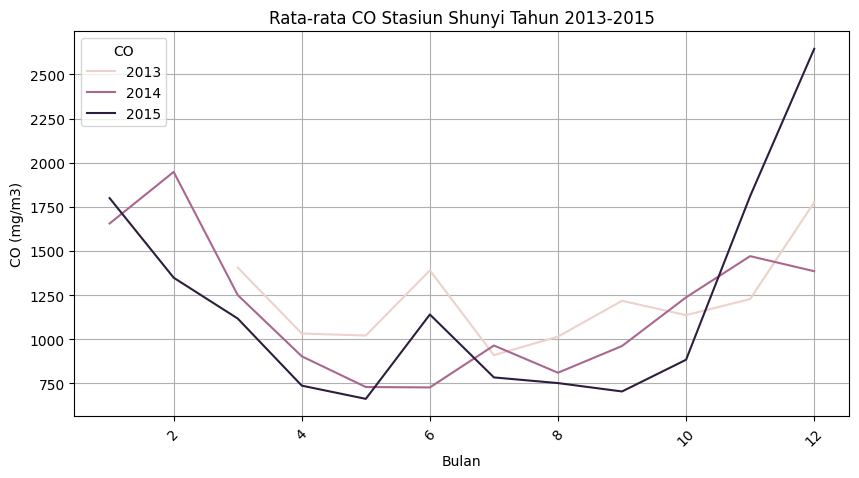

In [870]:
#kita akan visualisasi kan rata-rata total CO dan NO2 pada data2_grouped stasiun Shunyi untuk rentan tahun 2013-2015, kita akan sajikan kedalam 2 diagram garis yaitu CO dan NO2
plt.figure(figsize=(10,5))#mendefinisikan ukuran frame
#kita akan langsung rata-rata kan dalam setahun dari tahun 2013-2015 untuk CO
sns.lineplot(data=data2_grouped.loc[(data2_grouped.index.get_level_values('year') >= 2013) & (data2_grouped.index.get_level_values('year') <= 2015)], x='month', y=('CO', 'mean'), hue='year')
plt.title('Rata-rata CO Stasiun Shunyi Tahun 2013-2015')
plt.xlabel('Bulan')
plt.ylabel('CO (mg/m3)')
plt.xticks(rotation=45)
plt.legend(title='CO') 
plt.grid()
plt.show() #menampilkan diagram CO

Visualisasi NO2 pada stasiun Shunyi rentan waktu 2013-2015

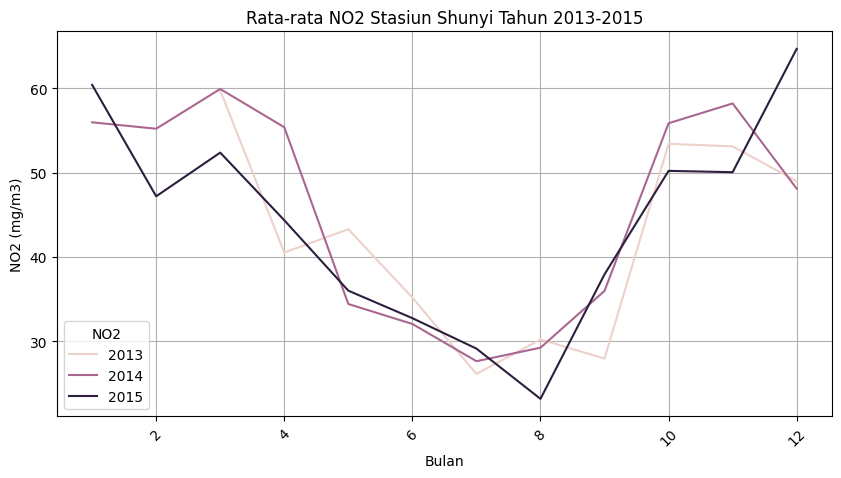

In [871]:
#kita akan visualisasi kan rata-rata total NO2 pada data2_grouped stasiun Shunyi untuk rentan tahun 2013-2015
plt.figure(figsize=(10,5))#mendefinisikan ukuran frame
#kita akan langsung rata-rata kan dalam setahun dari tahun 2013-2015 untuk NO2
sns.lineplot(data=data2_grouped.loc[(data2_grouped.index.get_level_values('year') >= 2013) & (data2_grouped.index.get_level_values('year') <= 2015)], x='month', y=('NO2', 'mean'), hue='year')
plt.title('Rata-rata NO2 Stasiun Shunyi Tahun 2013-2015')
plt.xlabel('Bulan')
plt.ylabel('NO2 (mg/m3)')
plt.xticks(rotation=45)
plt.legend(title='NO2') 
plt.grid()
plt.show() #menampilkan diagram NO2

**Insight:**
-Dari Visualisasi CO, terlihat bahwa pada bulan 4-10 dari tahun 2013-2015 terjadi penurunan kada CO pada kualitas udara, namun untuk kenaikan kadar CO tertinggi terjadi pada akhir tahun 2015.
-Setiap tahunnya dari 2013-2015, kadar CO secara ringkas mengalami penurunan namun pada akhir 2015 terjadi kenaikan tinggi pada kadar CO di stasiun Shunyi
-Dari Visualisasi data NO2, terlihat jelas bahwa kandungan NO2 di udara stasiun Shunyi dari rentan tahun 2013-2015 tergolong stabil
-Selalu terjadi penurunan kadar NO2 yang dimulai dari Bulan 3 sampai bulan 8 dari tahun 2013 sampai 2015, dan terjadi kenaikan lagi setelah bulan 8, untuk kenaikan tertinggi terjadi pada 2015 bulan 11 ke bulan 12

## Analisis Lanjutan (Opsional)

## Conclusion

-1.a Dari pertanyaan pertama, kita dapatkan jawaban bahwa selama 2014 rata rata suhu dibawah 30 drajat celcius dan suhu terpanas terjadi di bulan 6 sampai 8. untuk suhu dingin terjadi diantara bulan-bulan akhir tahun seperti bulan 11 sampai di awal tahun bulan 3

-2.a Dari pertanyaan kedua, kita dapatkan jawaban bahwasannya untuk nilai NO2 dari tahun 2013 sampai 2015 tidak terlalu berbeda tiap tahunnya.Namun peningkatan tertinggi terjadi pada bulan 11 sampai 12 ditahun 2015.
-2.b Pada grafik juga dapat disimpulkan untuk kadar NO2 akan selalu mengalami penurunan tiap tahunnya pada bulan ke 3 sampai bulan ke 8 tiap tahunnya dan akan kembali naik setelah bulan ke 8.
-2.c untuk nilai CO ternyata justru mengalami penurunan di awawl tahun 2015 dibandingkan dari 2013-2014, namun di akhir tahun 2015 mengalami pelonjakan nilai tertinggi dibandingkan 2013-2014 yaitu pada bulan ke 10-12 tahun 2015. namun terdapat nilai unik di bulan 6 2015 yang tiba tiba mengalami kelonjakan nilai drastis yang kemudian terjadi penurunan kembali di bulan berikutnya
-2.d Dari bulan 2 sampai bulan 5 selalu terjadi penurunan nilai CO namun di bulan 6 akan terjadi peningkatan yang kemudian berlanjut sampai di akhir tahun